# We will be using Haberman Cancer Survival Dataset From Kaggle  https://www.kaggle.com/gilsousa/habermans-survival-data-set. 

Our Objective is to "Classify will a cancer patient survive from Treatment or Not ."


In [137]:
#import all the required libraries
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import plotly.graph_objs as go

In [97]:
#loading  the dataset#
#datas= pd.read_csv("haberman.csv");
names = ['Age', 'Operation_year', 'Axil_Nodes', 'Surv_Status']
cancer_patient = pd.read_csv("haberman.csv", names=names)
#print(cancer_patient)

# No. of observations & features #
r,c=cancer_patient.shape
print("# of Observation are {0} and features are {1}" .format(r-1,c));


# of Observation are 305 and features are 4


In [98]:
#feature tag#
print(cancer_patient.columns)


Index(['Age', 'Operation_year', 'Axil_Nodes', 'Surv_Status'], dtype='object')


In [103]:
#class#
print(cancer_patient["Surv_Status"].value_counts())


1    225
2     81
Name: Surv_Status, dtype: int64


#### Note: Class-1 belongs to  the patient survived 5 years or longer, Class-2 is the patient died within 5 years

# Pair-Plot



                                  ***Pair-Plots***


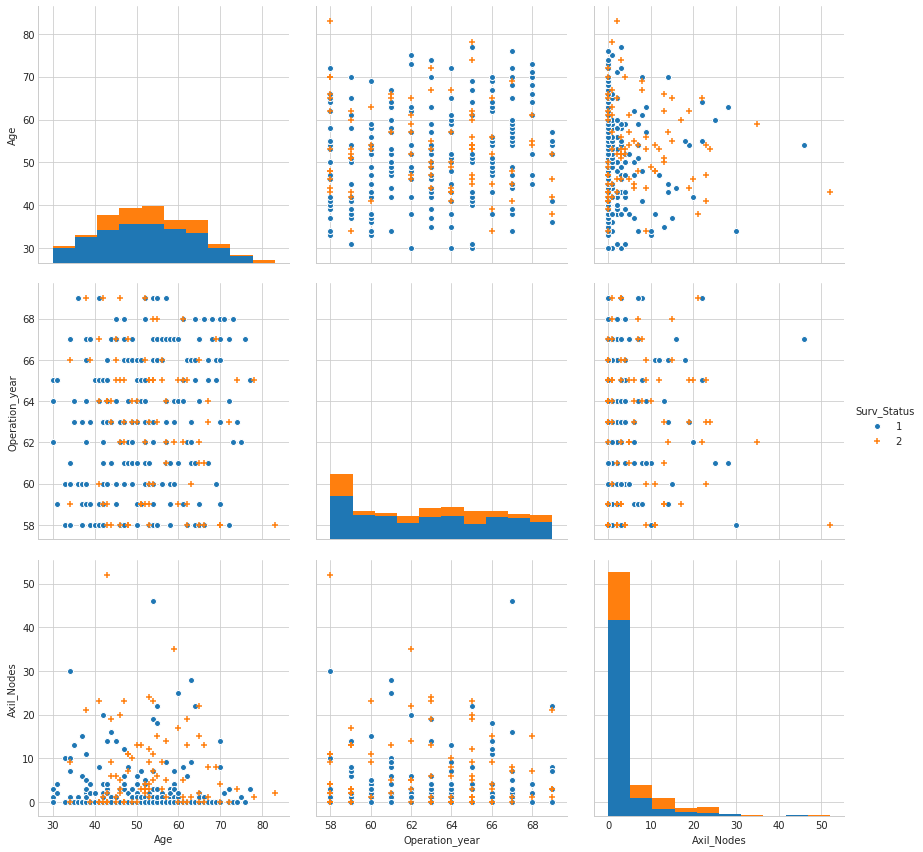

In [100]:
# plt.close();
sb.set_style("whitegrid");
#df=sb.load_dataset("haberman")
sb.pairplot(cancer_patient,hue="Surv_Status",size=4 ,markers=["o","+"],vars=["Age","Operation_year","Axil_Nodes"]);
print("\n\n                                  ***Pair-Plots***");
plt.show();



#### Observation:
In any Graph-plot there is no clear seperation b/w class.So we cannot make any Algo based on above graph-plots to classify.

# Histogram PDF,CDF

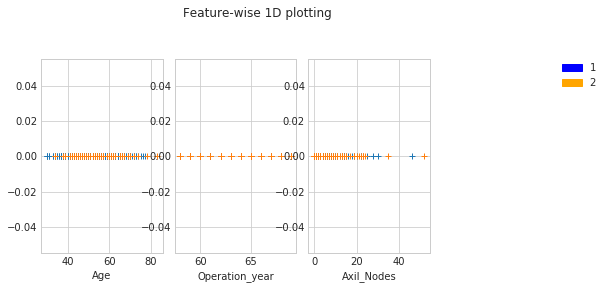

In [128]:
#1d plot#
cp1 = cancer_patient.loc[cancer_patient["Surv_Status"] ==1];
cp2 = cancer_patient.loc[cancer_patient["Surv_Status"] ==2];
plt.suptitle("Feature-wise 1D plotting")
plt.figure(1)

plt.subplot(131)
plt.plot(cp1["Age"],np.zeros_like(cp1['Age']),'+' )
plt.plot(cp2["Age"],np.zeros_like(cp2['Age']),'+')
plt.xlabel("Age")
plt.subplot(132)
plt.plot(cp1["Operation_year"],np.zeros_like(cp1['Operation_year']),'+' )
plt.plot(cp2["Operation_year"],np.zeros_like(cp2['Operation_year']),'+')
plt.xlabel("Operation_year")
plt.subplot(133)
plt.plot(cp1["Axil_Nodes"],np.zeros_like(cp1['Axil_Nodes']),'+' )
plt.plot(cp2["Axil_Nodes"],np.zeros_like(cp2['Axil_Nodes']),'+')
plt.xlabel("Axil_Nodes")

op = mpatches.Patch(color='orange', label='2')
bp = mpatches.Patch(color='blue', label='1')
plt.legend(bbox_to_anchor=(2.05, 1), loc=2, borderaxespad=0.,handles=[bp,op])
plt.subplots_adjust(left=0, wspace=0.1, top=0.8,hspace=2)


#### In 1-D  we can observe that points are overlapping ,Hence we cannot  classify them in 1D. 

/home/prashant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

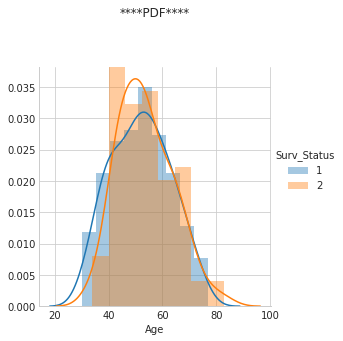

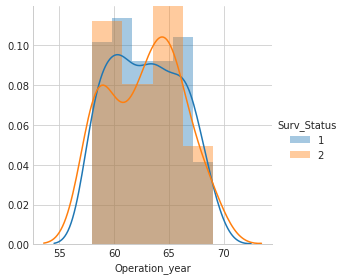

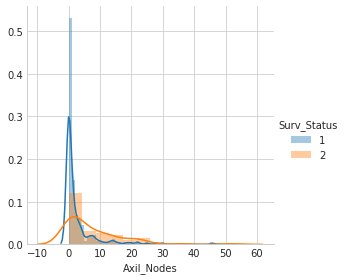

In [104]:
#PDF Histogram
plt.figure(2)
sb.set_style("whitegrid");

sb.FacetGrid(cancer_patient, hue="Surv_Status",size=4) \
    .map(sb.distplot,"Age") \
    .add_legend();

    
plt.title("****PDF****\n\n\n")    
plt.show();

sb.FacetGrid(cancer_patient, hue="Surv_Status",size=4) \
    .map(sb.distplot,"Operation_year") \
    .add_legend();
plt.show();


sb.FacetGrid(cancer_patient, hue="Surv_Status",size=4) \
    .map(sb.distplot,"Axil_Nodes") \
    .add_legend();
plt.show();


#### Observation: 
After seeing the pdf of all feature(Age,operation year, Axil Nodes)  ,we can conclude that it didn't depend which AGE group you are from or in which year you were OPERATED  there are almost equal probabiiity of cure and not. But some what we can see that if the Number of positive AXILLARY nodes detected are between 0-2 ,the probability is very high of cure. There is a little information in "AGE" which say if age < 38 -> Class-1 ,if age > 78 ->Class-2.

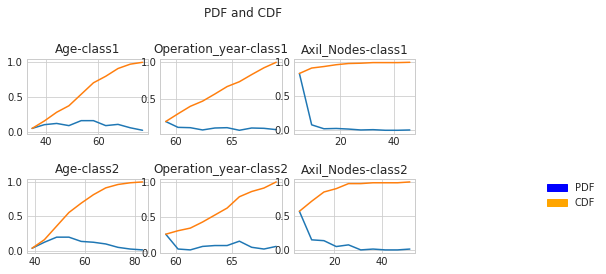

In [125]:
#PDF and CDF both

plt.figure(3)
plt.suptitle("PDF and CDF")
#Age
plt.subplot(231)
counts, bin_edges = np.histogram(cp1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Age-class1")
#plt.show();

plt.subplot(234)
counts, bin_edges = np.histogram(cp2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Age-class2")
#plt.show();



#Operation_year
plt.subplot(232)
counts, bin_edges = np.histogram(cp1['Operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Operation_year-class1")
#plt.show();    

plt.subplot(235)
counts, bin_edges = np.histogram(cp2['Operation_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Operation_year-class2")
#plt.show();    


#Axil_Nodes

plt.subplot(233)
counts, bin_edges = np.histogram(cp1['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Axil_Nodes-class1")
#plt.show();    



plt.subplot(236)
counts, bin_edges = np.histogram(cp2['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("Axil_Nodes-class2")
#plt.show();    

plt.subplots_adjust(left=0, wspace=0.1, top=0.8,hspace=.6)
op = mpatches.Patch(color='orange', label='CDF')
bp = mpatches.Patch(color='blue', label='PDF')
plt.legend(bbox_to_anchor=(2.05, 1), loc=2, borderaxespad=0.,handles=[bp,op])

#### Observation:
CDF of "Age" and "Operation_year" is almost identical ,we can come to to a conclusion that they will not be helpful .On the Other hand we observe that if "number of positive axillary nodes" detected is less than 2 , Almost 90% of class-1 lies there.


# Means and Std-dev

In [122]:
print("Means of 'AGE':")
print(np.mean(cp1["Age"]))
print(np.mean(cp2["Age"]))

print("\nStd-dev of 'AGE':");
print(np.std(cp1["Age"]))
print(np.std(cp2["Age"]))


Means of 'AGE':
52.01777777777778
53.67901234567901

Std-dev of 'AGE':
10.98765547510051
10.10418219303131


# Median ,Quantile ,Percentile ,MAD

In [123]:

print("\nMedians of 'Age':")
print(np.median(cp1["Age"]))
print(np.median(cp2["Age"]))

print("\nQuantiles:")
print(np.percentile(cp1["Age"],np.arange(0, 100, 25)))
print(np.percentile(cp2["Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(cp1["Age"],90))
print(np.percentile(cp2["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(cp1["Age"]))
print(robust.mad(cp2["Age"]))


Medians of 'Age':
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box plot an Whiskers


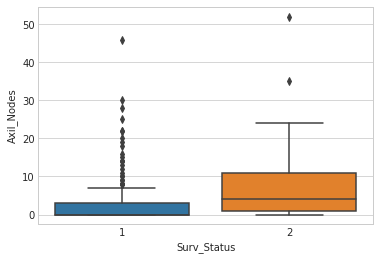

In [134]:
sb.boxplot(x='Surv_Status',y='Axil_Nodes', data=cancer_patient)
plt.show()



#### Observation:
 Almost 100% of Class-1 have # of Axillary nodes less than 10.


# 3D scatter plot

In [141]:
#import plotly.plotly as py
import plotly as py


#df = pd.read_csv('haberman.csv')
names = ['Age', 'Operation_year', 'Axil_Nodes', 'Surv_Status']
cancer_patient = pd.read_csv("haberman.csv", names=names)
cancer_patient.head()

py.tools.set_credentials_file(username='kouya_marino', api_key='iV2bKu4SzUBuPknuNlDq')

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(cancer_patient['Surv_Status'].unique())):
    name = cancer_patient['Surv_Status'].unique()[i]
    color = colors[i]
    x = cancer_patient[ cancer_patient['Surv_Status'] == name ]['Age']
    y = cancer_patient[ cancer_patient['Surv_Status'] == name ]['Operation_year']
    z = cancer_patient[ cancer_patient['Surv_Status'] == name ]['Axil_Nodes']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=2, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Cancer dataset',
    scene=dict(
        xaxis=dict(
            title='AGE',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            title='Year',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            title='Axillary',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)


fig = dict(data=data, layout=layout)

layout = go.Layout(showlegend=True)
py.plotly.iplot(fig, filename='jupyter-Cancer_patient')

## Final Conclusion:
   After seeing data in 1D,2D,3D conclusion we can make is that 3D doesn't give us new information in this case .And we can have the final conclusion same provided by PDF-CDF graph which says that Most(90%) of the Class-1 data pt. lies within  "Axillary nodes" less than 2. and PDF-histogram shows than  If "Age" is less than 38  it lies to Class-1 and if "Age" > 78 ->Class-2. 